# Validation of Diffusivity at Given Reynolds Numbers

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

import exponax as ex

In [2]:
L = 2 * jnp.pi
N = 256
NUM_SUBSTEPS = 10

In [3]:
DT_40 = 0.1
DT_100 = 0.01

In [4]:
ic = ex.ic.DiffusedNoise(2)(N, key=jax.random.PRNGKey(0))

In [5]:
kolm_stepper_40 = ex.RepeatedStepper(
    ex.stepper.KolmogorovFlowVorticity(
        2,
        L,
        N,
        DT_40 / NUM_SUBSTEPS,
        diffusivity=1 / 40,
        drag=-0.1,  # No drag
    ),
    NUM_SUBSTEPS,
)

In [6]:
warmed_ic_40 = ex.repeat(kolm_stepper_40, int(500 / DT_40))(ic)

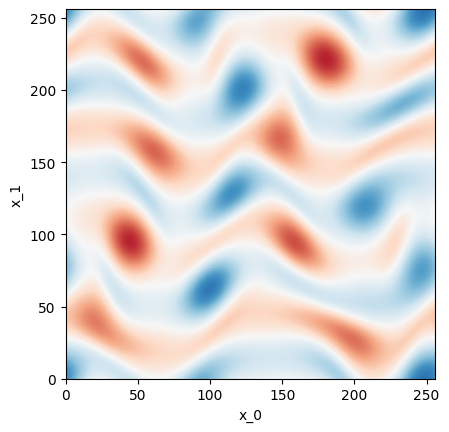

In [7]:
ex.viz.plot_state_2d(warmed_ic_40, vlim=(-10, 10))

In [8]:
kolm_stepper_100 = ex.RepeatedStepper(
    ex.stepper.KolmogorovFlowVorticity(
        2,
        L,
        N,
        DT_100 / NUM_SUBSTEPS,
        diffusivity=1 / 100,
        drag=-0.1,  # No drag
    ),
    NUM_SUBSTEPS,
)

In [9]:
warmed_ic_100 = ex.repeat(kolm_stepper_100, int(100 / DT_100))(ic)

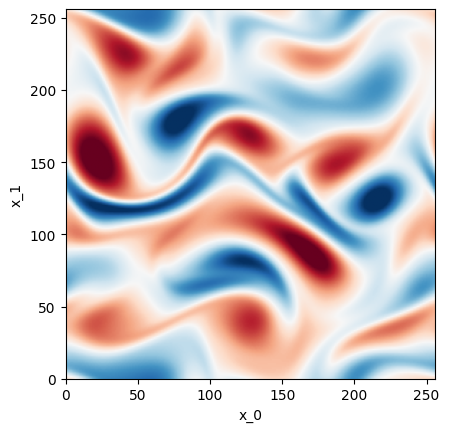

In [10]:
ex.viz.plot_state_2d(warmed_ic_100, vlim=(-10, 10))

In [11]:
trj_40 = ex.rollout(kolm_stepper_40, 1000, include_init=True)(warmed_ic_40)
enstrophy_spectra_40 = jax.vmap(ex.get_spectrum)(trj_40)
mean_enstrophy_spectrum_40 = jnp.mean(enstrophy_spectra_40, axis=0)

In [12]:
trj_100 = ex.rollout(kolm_stepper_100, 1000, include_init=True)(warmed_ic_100)
enstrophy_spectra_100 = jax.vmap(ex.get_spectrum)(trj_100)
mean_enstrophy_spectrum_100 = jnp.mean(enstrophy_spectra_100, axis=0)

Below matches Fig. 6 of

    Chandler, G.J. and Kerswell, R.R. (2013) ‘Invariant recurrent
    solutions embedded in a turbulent two-dimensional Kolmogorov flow’,
    Journal of Fluid Mechanics, 722, pp. 554–595.
    doi:10.1017/jfm.2013.122.

available at https://www.damtp.cam.ac.uk/user/rrk26/Papers/CK13.pdf

Text(0.5, 0, 'Wavenumber $k$')

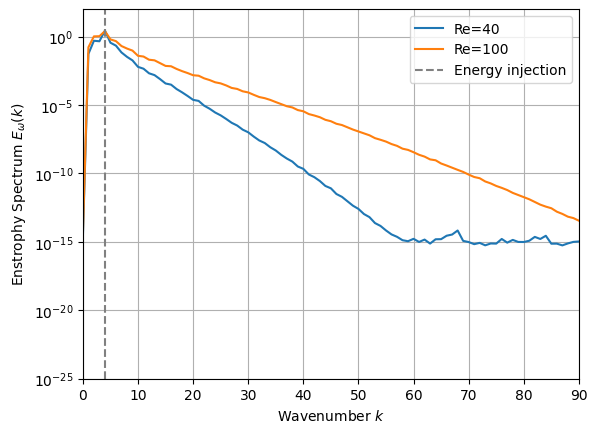

In [13]:
plt.semilogy(mean_enstrophy_spectrum_40[0], label="Re=40")
plt.semilogy(mean_enstrophy_spectrum_100[0], label="Re=100")
plt.vlines(4, 1e-25, 1e2, color="grey", linestyle="--", label="Energy injection")
plt.xlim(0, 90)
plt.ylim(1e-25, 1e2)
plt.yticks(
    [
        1e-25,
        1e-20,
        1e-15,
        1e-10,
        1e-5,
        1e0,
    ]
)
plt.grid()
plt.legend()
plt.ylabel(r"Enstrophy Spectrum $E_\omega(k)$")
plt.xlabel("Wavenumber $k$")